In [1]:
# importing the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("/Mall_Customers.csv")

df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum().any()

False

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
df.drop(columns='CustomerID',inplace=True)

In [13]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


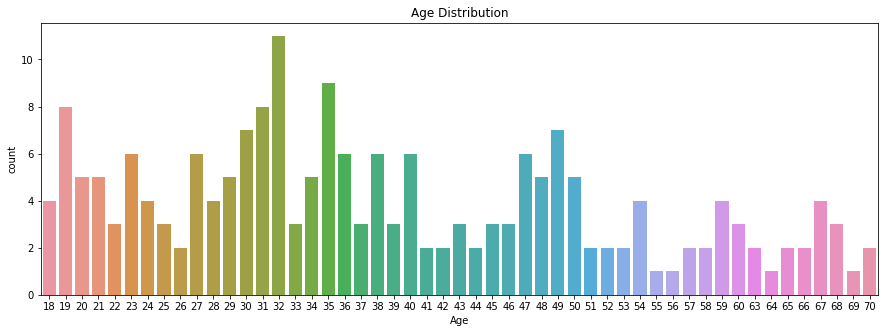

In [14]:
# distribution of Age Distribution
plt.figure(figsize=(15,5))
sns.countplot(x ='Age', data = df)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

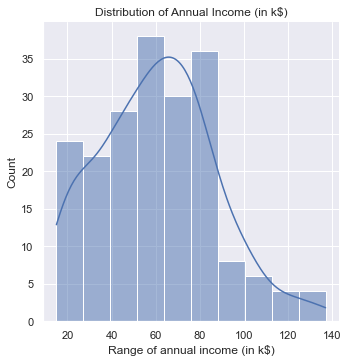

In [15]:
# distribution of annual income
sns.set(style="darkgrid")
sns.displot(df["Annual Income (k$)"], kde=True)

plt.title("Distribution of Annual Income (in k$)")
plt.xlabel("Range of annual income (in k$)")
plt.ylabel("Count")

plt.show()

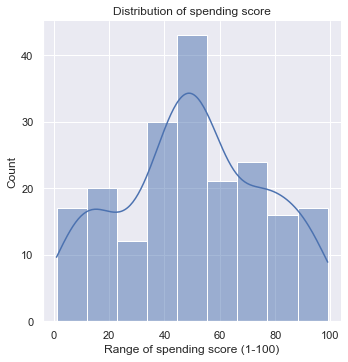

In [16]:
# distribution of spending score
sns.set(style="darkgrid")
sns.displot(df["Spending Score (1-100)"], kde=True)

plt.title('Distribution of spending score')
plt.xlabel('Range of spending score (1-100)')
plt.ylabel('Count');

Text(0, 0.5, 'Count')

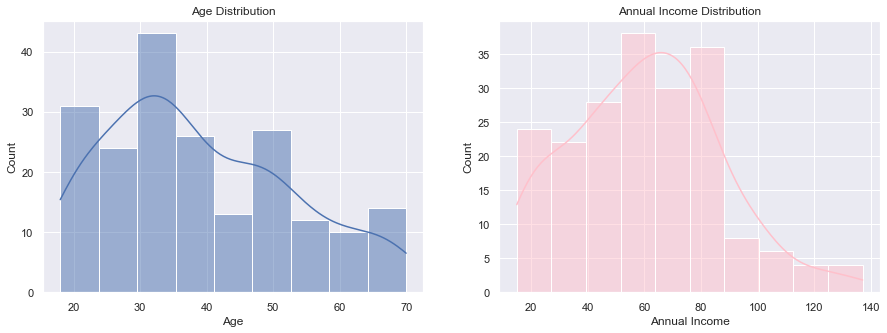

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x='Age', data=df, kde =True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.histplot(x ='Annual Income (k$)', data=df, color='Pink', kde = True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')

In [26]:
gender_counts = df['Gender'].value_counts()
gender_counts

Female    112
Male       88
Name: Gender, dtype: int64

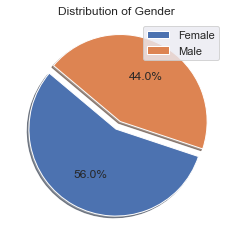

In [38]:
explode = [0,0.1]
plt.pie(gender_counts, explode=explode,autopct='%1.1f%%', shadow=True,startangle=140)
plt.title('Distribution of Gender')
plt.legend(labels=['Female','Male'])
plt.show()


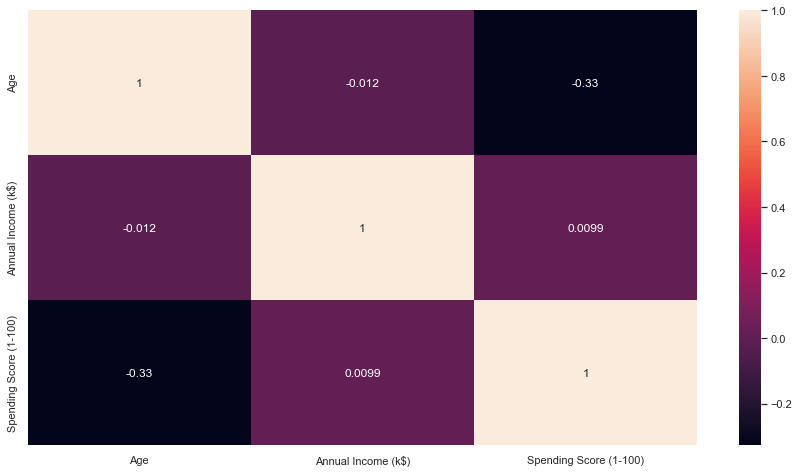

In [42]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

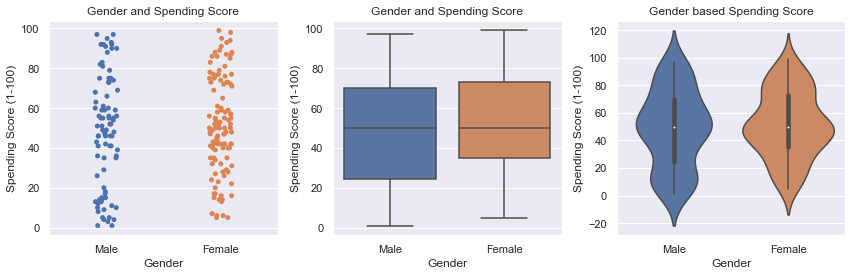

In [46]:

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot 1 
sns.stripplot(x='Gender', y='Spending Score (1-100)', data=df,ax=axes[0])
axes[0].set_title('Gender and Spending Score')

# Plot 2 
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, ax=axes[1])
axes[1].set_title('Gender and Spending Score')

# Plot 3 
sns.violinplot(x='Gender', y='Spending Score (1-100)', data=df,ax=axes[2])
axes[2].set_title('Gender based Spending Score')

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()



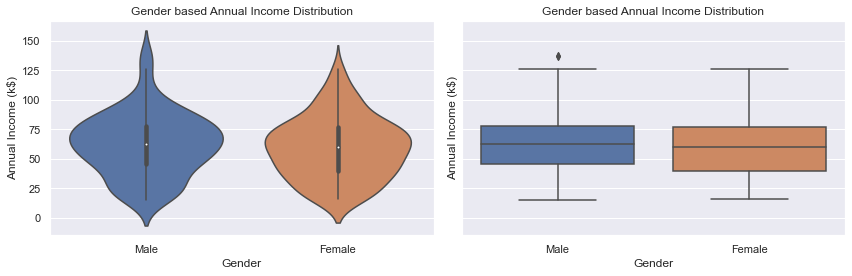

In [54]:


# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4),sharey=True)

# Plot 1 
sns.violinplot(x='Gender',y='Annual Income (k$)', data=df,ax=axes[0])
axes[0].set_title('Gender based Annual Income Distribution')

# Plot 2 
sns.boxplot(x='Gender',y='Annual Income (k$)', data=df, ax=axes[1])
axes[1].set_title('Gender based Annual Income Distribution')


# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()

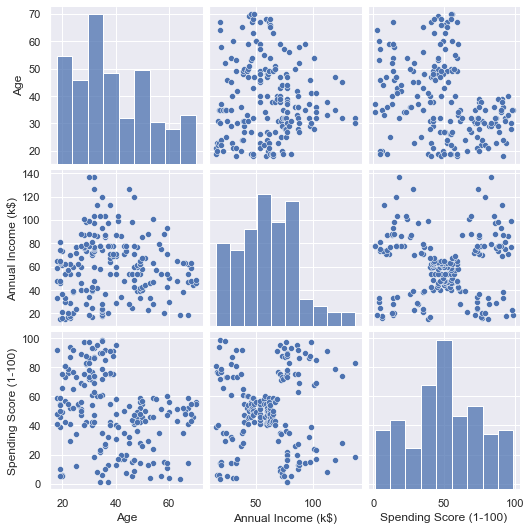

In [55]:
sns.pairplot(df);

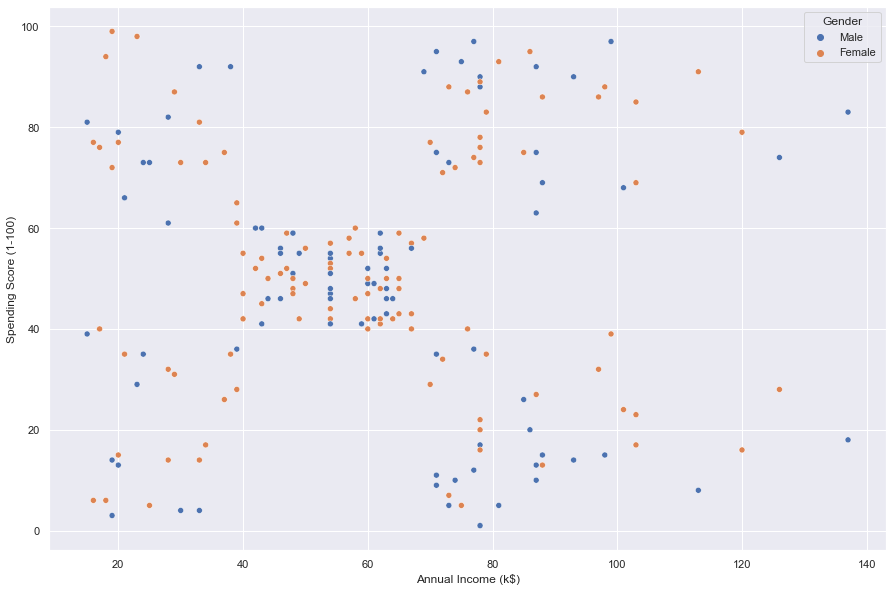

In [57]:
plt.figure(figsize=(15,10))

sns.scatterplot(x ="Annual Income (k$)", y="Spending Score (1-100)", data=df, hue = "Gender")
plt.show()

In [60]:
#Cluster Analysis

In [61]:
df_2 = df.drop(columns="Gender")

In [62]:
df_2.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [64]:
from pyclustertend import hopkins

In [65]:
hopkins(df_2, df_2.shape[0])

0.318084348948746

In [67]:
x1 = df.loc[:,['Age','Spending Score (1-100)']]
x1

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [70]:
hopkins(x1, x1.shape[0])

0.3112285543024181

In [72]:
import warnings
warnings.filterwarnings("ignore")


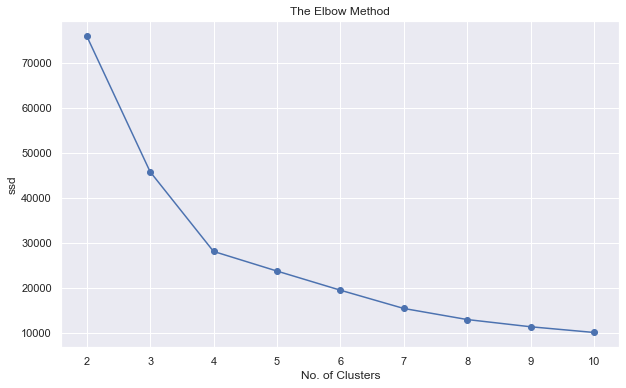

In [73]:
from sklearn.cluster import KMeans

ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n,random_state=42)
    kmeans.fit(x1)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()

In [74]:
ssd

[75949.15601023019,
 45840.67661610866,
 28165.583566629342,
 23811.52352472089,
 19566.522341377604,
 15514.19313435103,
 13055.626865965578,
 11453.288911292719,
 10186.50107324238]

In [75]:
pd.Series(ssd).diff()

0             NaN
1   -30108.479394
2   -17675.093049
3    -4354.060042
4    -4245.001183
5    -4052.329207
6    -2458.566268
7    -1602.337955
8    -1266.787838
dtype: float64

In [76]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,30108.479394
3,17675.093049
4,4354.060042
5,4245.001183
6,4052.329207
7,2458.566268
8,1602.337955
9,1266.787838


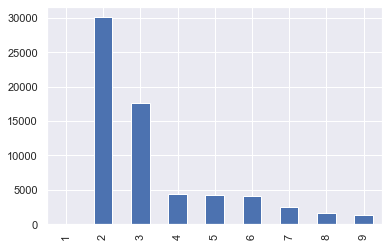

In [78]:
df_diff.plot(kind='bar',legend =False);

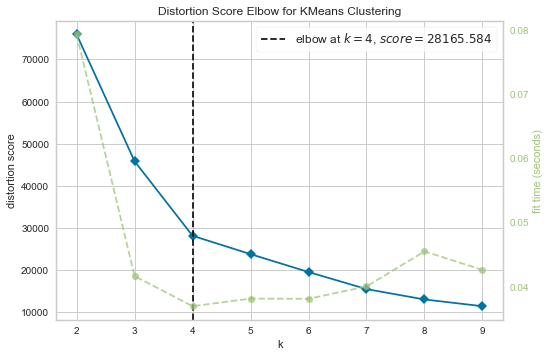

In [81]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(x1)
visu.poof();

In [82]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(x1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(x1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.44526667994351227
For n_clusters=6, the silhouette score is 0.44845919861907363
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.4280182657184854
For n_clusters=9, the silhouette score is 0.41447652571263843
For n_clusters=10, the silhouette score is 0.40744304730373593


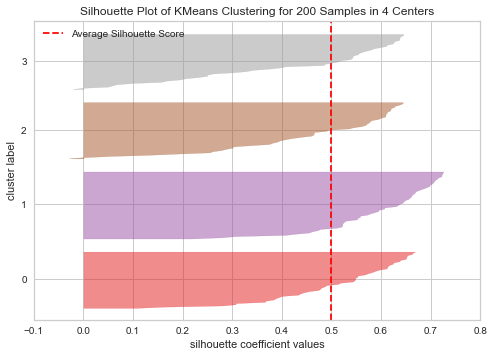

In [86]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(x1)  
visualizer.poof();

# Apply K Mean

In [89]:
kmeans = KMeans(n_clusters = 4, random_state=42)

In [90]:
kmeans.fit_predict(x1)

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [91]:
x1["cluster_Kmeans"] = kmeans.fit_predict(x1)

In [92]:
x1

,Age,Spending Score (1-100),cluster_Kmeans
0,19,39,3
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,3
...,...,...,...
195,35,79,1
196,45,28,2
197,32,74,1
198,32,18,2


# iv. Visualizing and Labeling All the Cluster


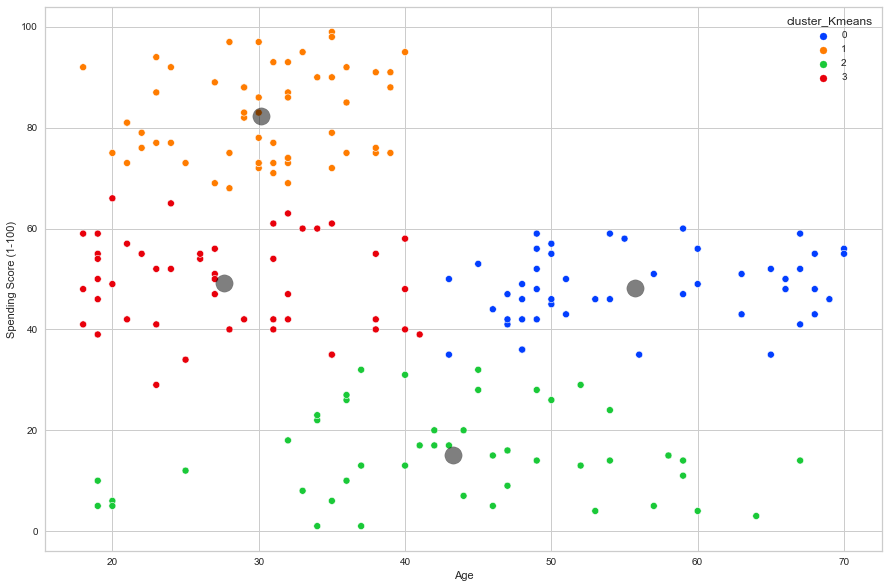

In [96]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='cluster_Kmeans', data=x1, palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5);

#Clustering based on Annual Income and Spending Score

i. Create a new dataset with two variables of your choice 

In [97]:
x2 = df.loc[:,['Annual Income (k$)','Spending Score (1-100)']]
x2.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [98]:
hopkins(x2,x2.shape[0])

0.30349827265012025

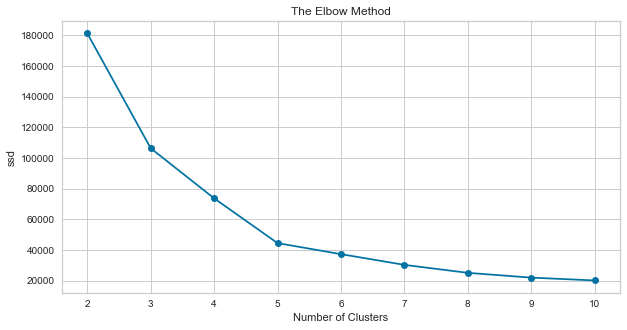

In [100]:
ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n, random_state=42)
    kmeans.fit(x2)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(2, 11), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('ssd')
plt.show();

In [101]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,75015.222897
3,32668.584023
4,29231.333592
5,7214.640937
6,6992.470893
7,5204.926014
8,3119.622814
9,1844.723850


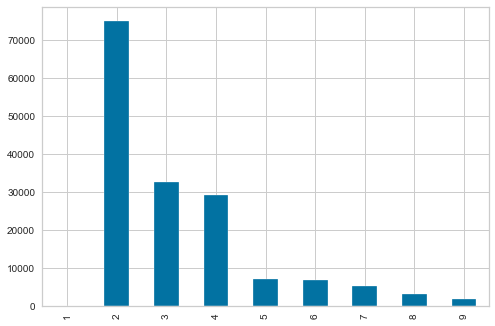

In [103]:
df_diff.plot(kind='bar',legend=False);

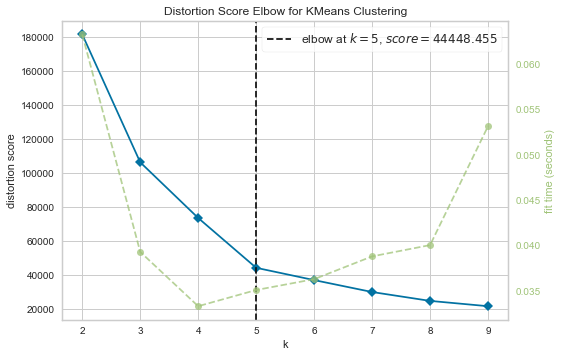

In [104]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(x2)
visu.poof();

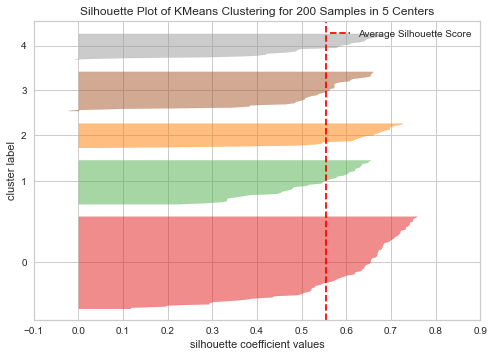

In [105]:
model4 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model4)

visualizer.fit(x2)    # Fit the data to the visualizer
visualizer.poof();

In [106]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(x2)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(x2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5288104473798049
For n_clusters=8, the silhouette score is 0.45481197931195283
For n_clusters=9, the silhouette score is 0.4561091950997367
For n_clusters=10, the silhouette score is 0.4410568674364981


In [107]:
#iii. Apply K Means

kmeans2 = KMeans(n_clusters=5, random_state=42)
kmeans2.fit_predict(x2)

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [108]:
x2['cluster_Kmeans'] = kmeans2.fit_predict(x2)
x2

,Annual Income (k$),Spending Score (1-100),cluster_Kmeans
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


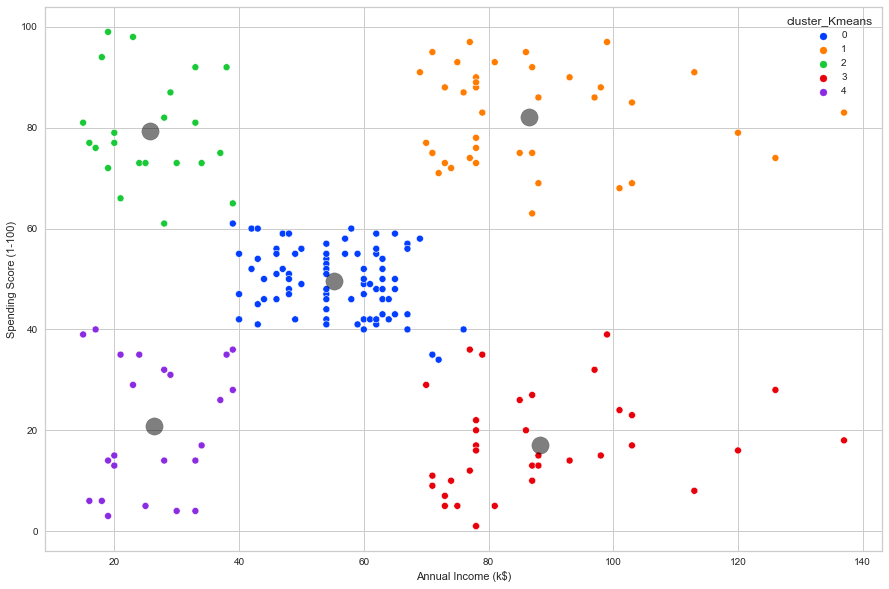

In [113]:
#iv. Visualizing and Labeling All the Clusters

plt.figure(figsize=(15,10))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster_Kmeans', data=x2, palette="bright")
centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5);

# Hierarchical Clustering

i. Determine optimal number of clusters using Dendogram

linkcode
Clustering based on Age and Spending Score- x1

In [114]:
from scipy.cluster.hierarchy import linkage

In [115]:
hc_ward = linkage(y = x1, method = "ward")
hc_complete = linkage(x1, "complete")
hc_average = linkage(x1, "average")
hc_single = linkage(x1, "single")

In [116]:
from scipy.cluster.hierarchy import dendrogram

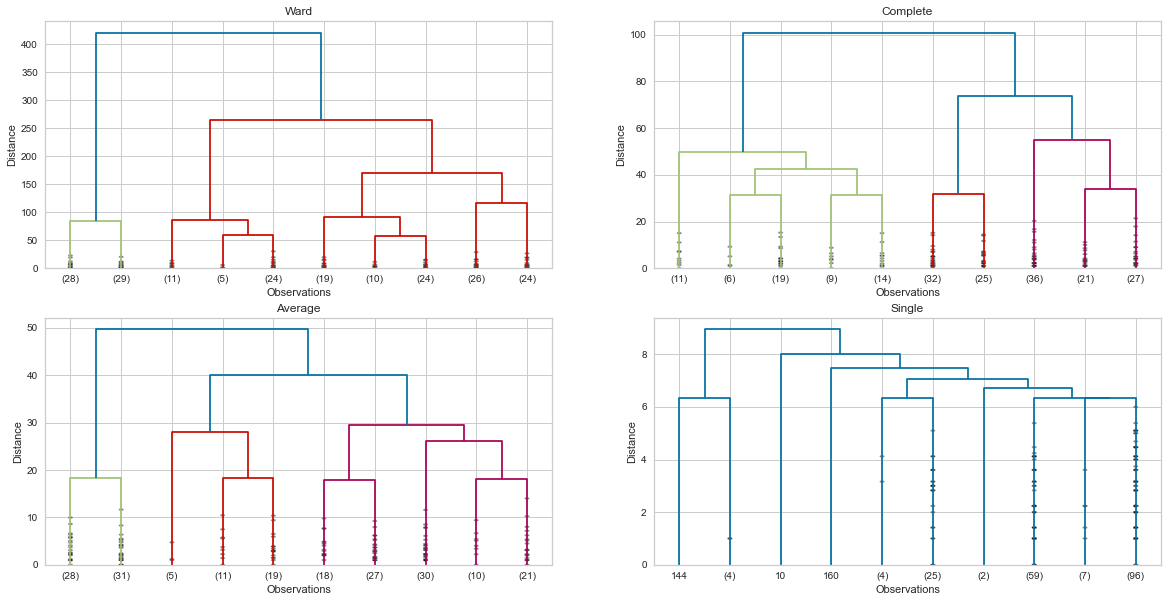

In [117]:
plt.figure(figsize = (20,10))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

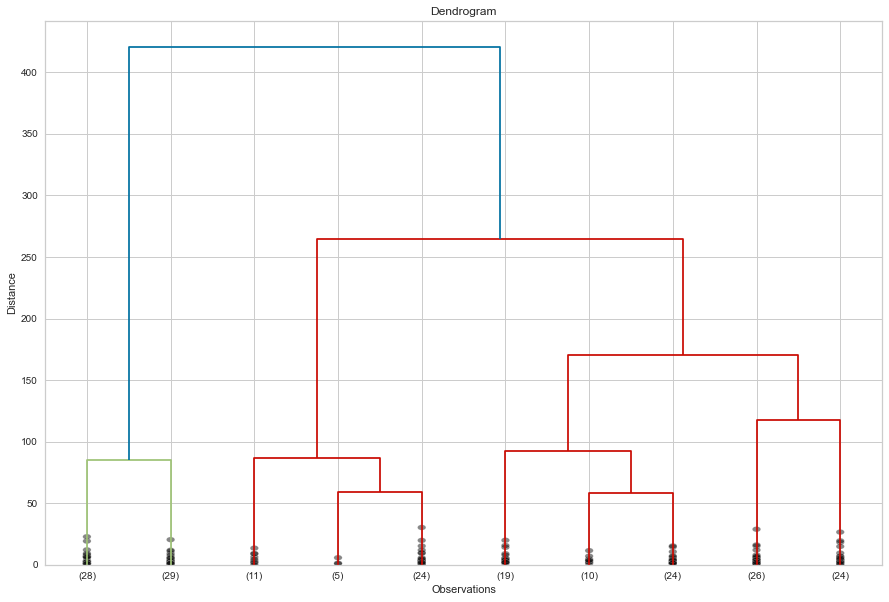

In [119]:
plt.figure(figsize = (15,10))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [120]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(x1)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(x1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.45454592584148096
For n_clusters=3, the silhouette score is 0.4406245222112989
For n_clusters=4, the silhouette score is 0.4608405468661758
For n_clusters=5, the silhouette score is 0.4043739061256346
For n_clusters=6, the silhouette score is 0.4125751937244674
For n_clusters=7, the silhouette score is 0.4158018450743115
For n_clusters=8, the silhouette score is 0.3881443379710403
For n_clusters=9, the silhouette score is 0.39456163701637914
For n_clusters=10, the silhouette score is 0.388362398923104


### Clustering based on Annual Income and Spending Score- x2

In [121]:
hc_ward = linkage(y = x2, method = "ward")
hc_complete = linkage(x2, "complete")
hc_average = linkage(x2, "average")
hc_single = linkage(x2, "single")

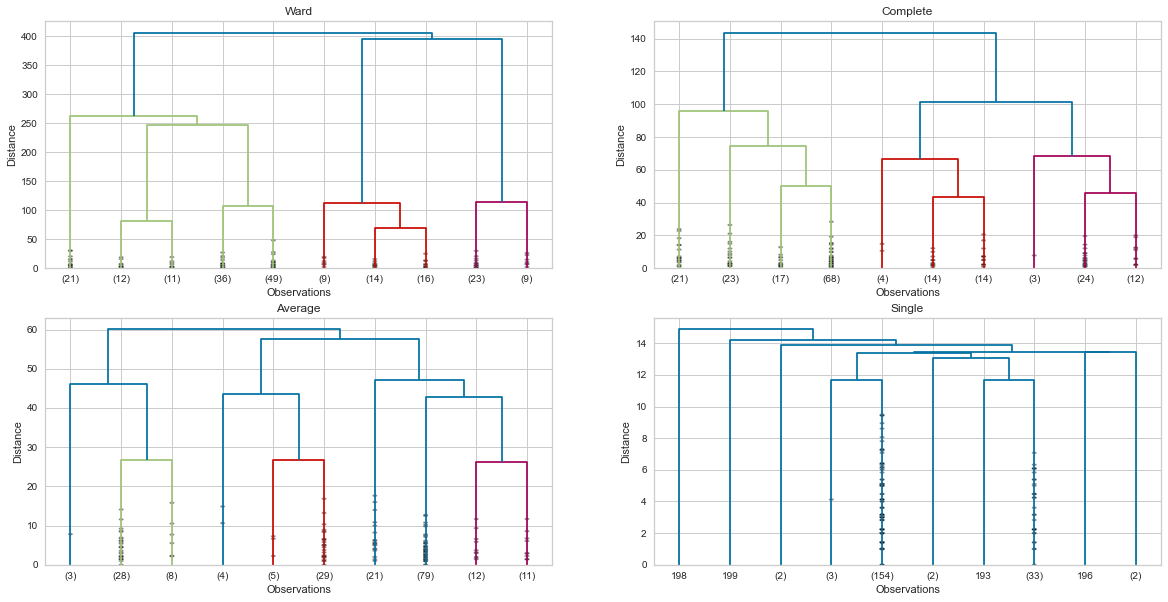

In [122]:
plt.figure(figsize = (20,10))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);


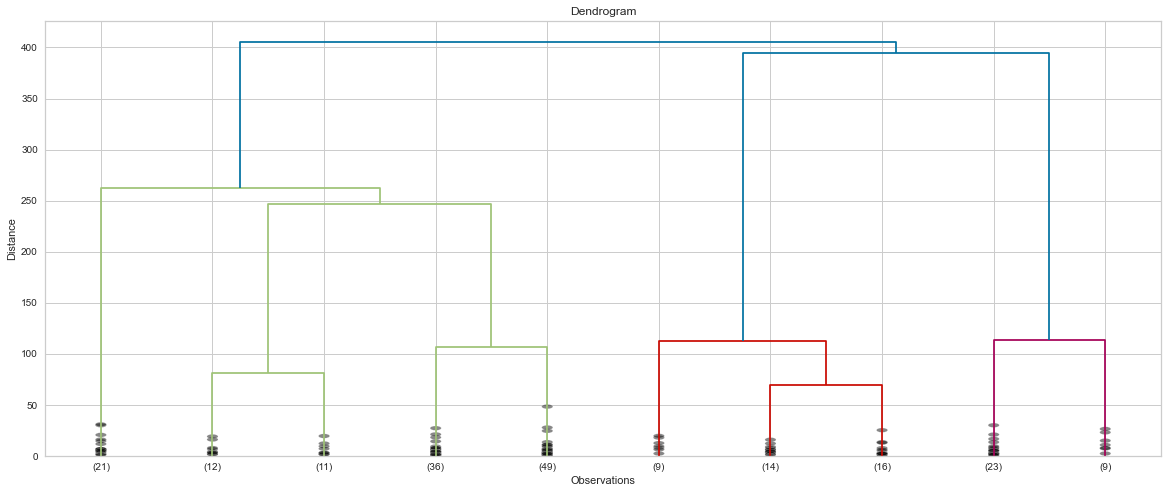

In [123]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [124]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(x2)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(x2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.36670646297521314
For n_clusters=3, the silhouette score is 0.46143086477646994
For n_clusters=4, the silhouette score is 0.491312811099761
For n_clusters=5, the silhouette score is 0.554020280939098
For n_clusters=6, the silhouette score is 0.5389731107100326
For n_clusters=7, the silhouette score is 0.5207937874273341
For n_clusters=8, the silhouette score is 0.4331336323243057
For n_clusters=9, the silhouette score is 0.4394698104182007
For n_clusters=10, the silhouette score is 0.4347953869041223


### ii. Apply Agglomerative Clustering

Age and Spending Score- x1

In [125]:
Agg1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_agg= Agg1.fit_predict(x1)

In [126]:
x1['cluster_Agg'] = y_agg
x1.head()

,Age,Spending Score (1-100),cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,1,3
2,20,6,2,2
3,23,77,1,3
4,31,40,3,0


In [127]:
Agg2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_agg2 = Agg2.fit_predict(x2)

x2['cluster_Agg'] = y_agg2
x2.head()

,Annual Income (k$),Spending Score (1-100),cluster_Kmeans,cluster_Agg
0,15,39,4,4
1,15,81,2,3
2,16,6,4,4
3,16,77,2,3
4,17,40,4,4


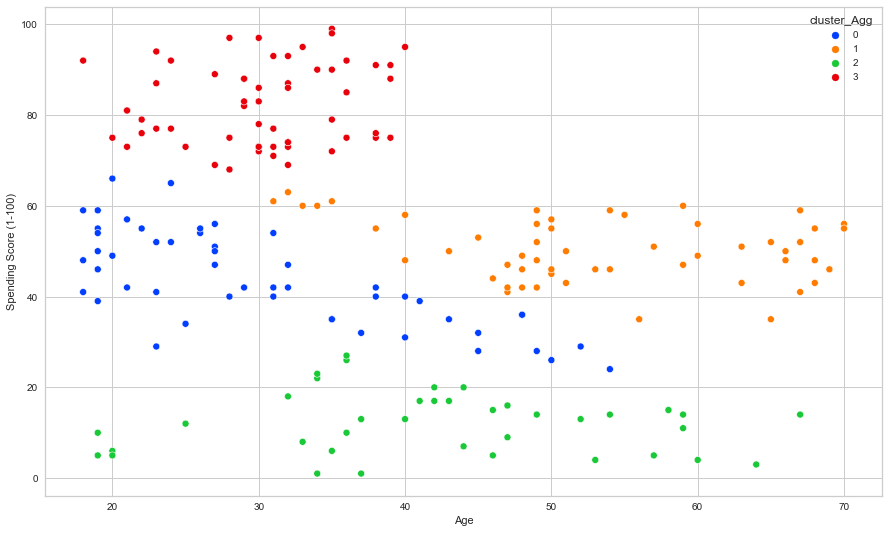

In [129]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='cluster_Agg', data=x1, palette="bright");

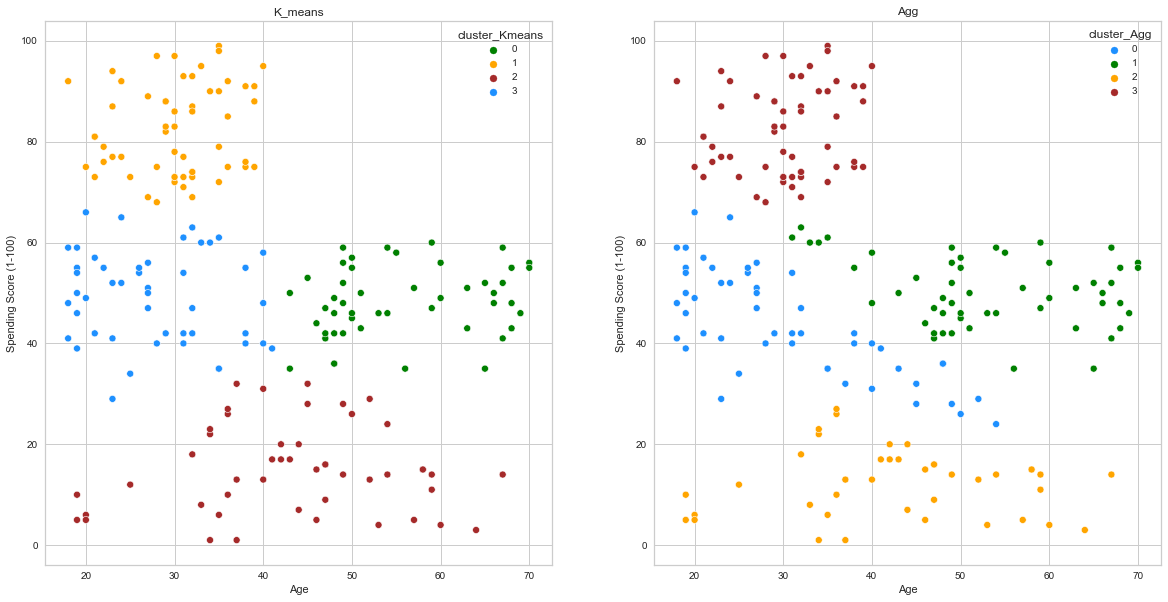

In [133]:
plt.figure(figsize = (20,10))

plt.subplot(121)
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='cluster_Kmeans', data=x1,palette=['green','orange','brown',
                                                                             'dodgerblue'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='cluster_Agg', data=x1,palette=['dodgerblue','green',
                                                                              'orange','brown'])
plt.title("Agg")
plt.show()

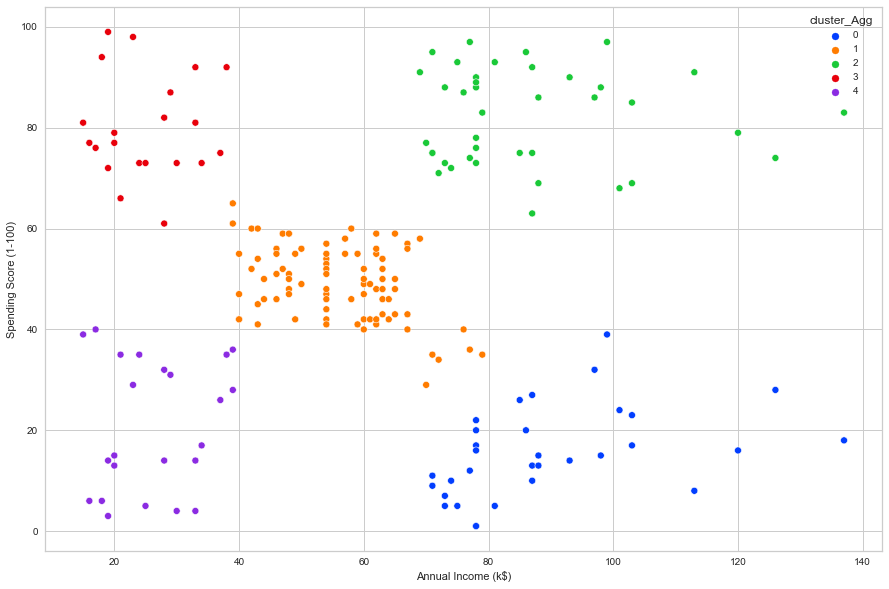

In [137]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster_Agg', data=x2 ,palette="bright");

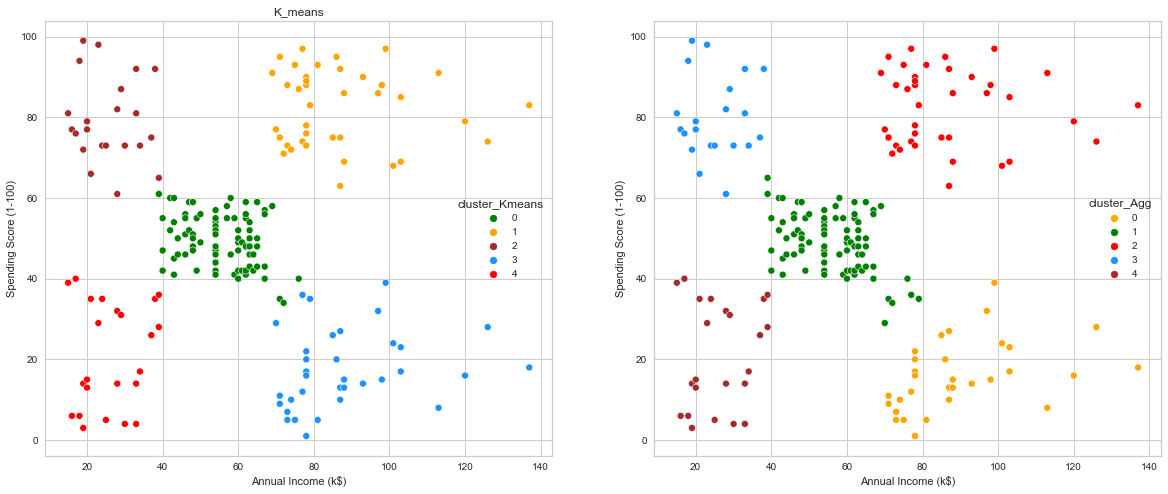

In [141]:
plt.figure(figsize = (20,8))

plt.subplot(121)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster_Kmeans', data=x2, palette=['green', 'orange',
                                                            'brown','dodgerblue','red'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster_Agg', data=x2, palette=['orange', 'green',
                                                            'red', 'dodgerblue', 'brown'])
plt.show()

In [142]:
x1.head()

,Age,Spending Score (1-100),cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,1,3
2,20,6,2,2
3,23,77,1,3
4,31,40,3,0


In [144]:
x1.cluster_Kmeans.value_counts()

1    57
2    48
0    48
3    47
Name: cluster_Kmeans, dtype: int64

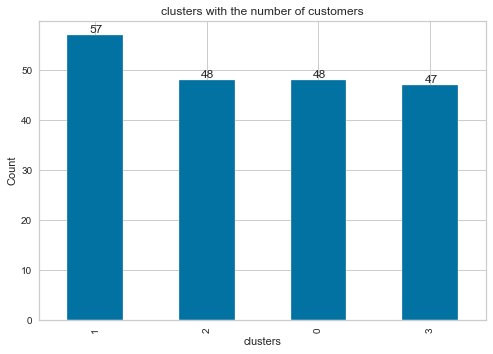

In [145]:

plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = x1.cluster_Kmeans.value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.2, p.get_height() + 0.5))

In [146]:
df["cluster_Age_Spending_Score"] = x1.cluster_Kmeans
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,1
2,Female,20,16,6,2
3,Female,23,16,77,1
4,Female,31,17,40,3


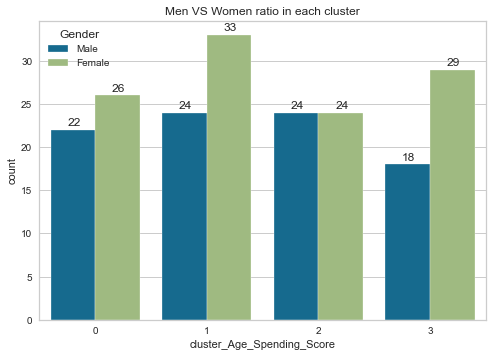

In [147]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Age_Spending_Score, hue=df.Gender)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.15, p.get_height() + 0.5))

In [148]:
df.groupby("cluster_Age_Spending_Score").mean()

,Age,Annual Income (k$),Spending Score (1-100)
cluster_Age_Spending_Score,,,
0,55.708333,54.770833,48.229167
1,30.175439,66.070175,82.350877
2,43.291667,66.937500,15.020833
3,27.617021,53.276596,49.148936


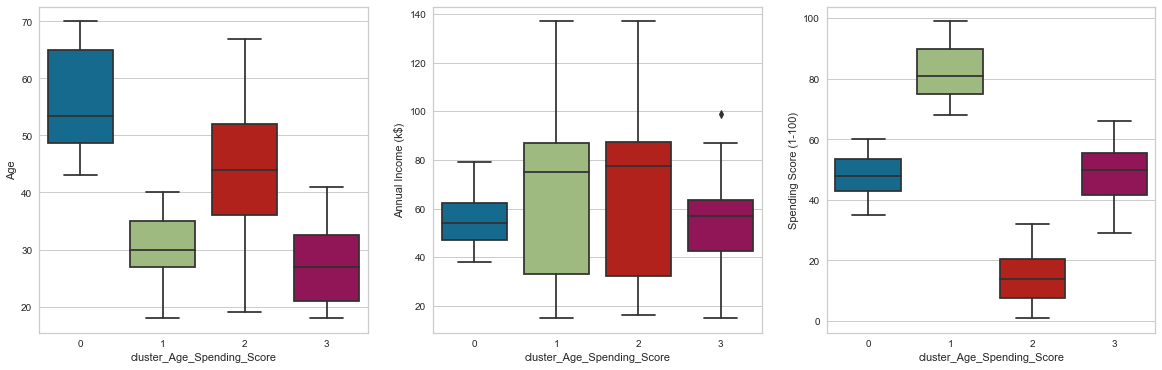

In [150]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Age", x = "cluster_Age_Spending_Score", data = df)

plt.subplot(132)
sns.boxplot(y = "Annual Income (k$)", x = "cluster_Age_Spending_Score",  data = df)

plt.subplot(133)
sns.boxplot(y = "Spending Score (1-100)", x = "cluster_Age_Spending_Score", data = df)
plt.show()

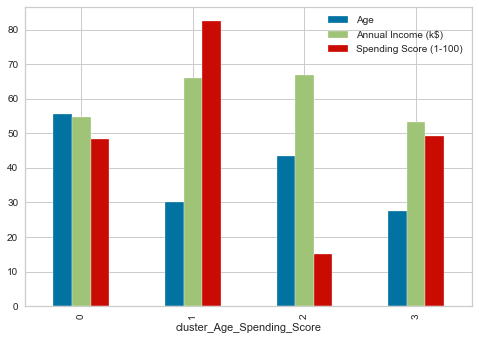

In [152]:

df.groupby("cluster_Age_Spending_Score").mean().plot(kind='bar')
plt.show()

#### 
cluster 0 : The average age is around 55, both annula_income and spending_scores are on average. It should be researched what can be done to direct to more spending.

cluster 1: The average age is around 30, the annula_income is high but the spending_scores are very low. This group is our target audience and specific strategies should be developed to drive this group to spend.

cluster 2 :The average age is around 43. The annula_income is high and spending_scores are very high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it.

cluster 3: The average age is around 27.both annula_income and spending_scores are on average. It should be researched what can be done to direct to more spendin

In [153]:
x2

,Annual Income (k$),Spending Score (1-100),cluster_Kmeans,cluster_Agg
0,15,39,4,4
1,15,81,2,3
2,16,6,4,4
3,16,77,2,3
4,17,40,4,4
...,...,...,...,...
195,120,79,1,2
196,126,28,3,0
197,126,74,1,2
198,137,18,3,0


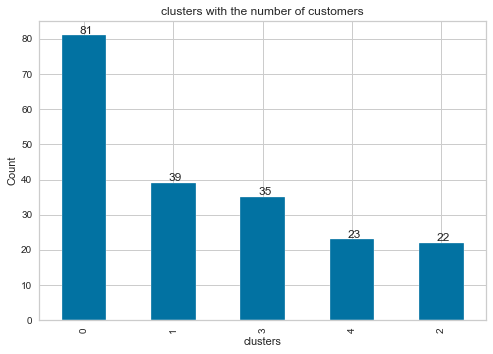

In [154]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = x2.cluster_Kmeans.value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.2, p.get_height() + 0.5))

In [155]:
df.drop(columns= "cluster_Age_Spending_Score", inplace=True)
df["cluster_Annual_Income_Spending_Score"] = x2.cluster_Kmeans
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_Annual_Income_Spending_Score
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4


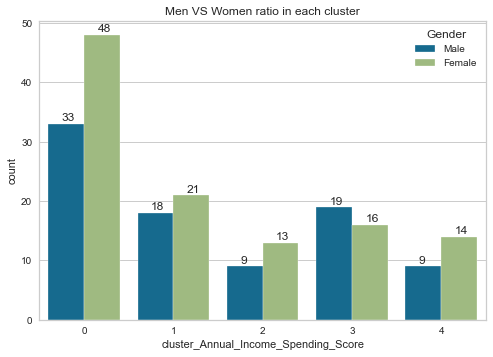

In [156]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Annual_Income_Spending_Score, hue=df.Gender)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.15, p.get_height() + 0.5))

In [157]:
df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean()

Age  Annual Income (k$)  \
Gender cluster_Annual_Income_Spending_Score                                  
Female 0                                     40.895833           55.354167   
       1                                     32.190476           86.047619   
       2                                     25.461538           25.692308   
       3                                     43.250000           90.937500   
       4                                     43.214286           27.357143   
Male   0                                     45.363636           55.212121   
       1                                     33.277778           87.111111   
       2                                     25.000000           25.777778   
       3                                     39.315789           85.894737   
       4                                     48.333333           24.666667   

                                             Spending Score (1-100)  
Gender cluster_Annual_Income_Spending_Score                          
Female 0                                                  49.000000  
       1                                                  81.666667  
       2                                                  80.538462  
       3                                                  22.062500  
       4                                                  21.714286  
Male   0                                                  50.272727  
       1                                                  82.666667  
       2                                                  77.666667  
       3                                                  12.947368  
       4                                                  19.666667

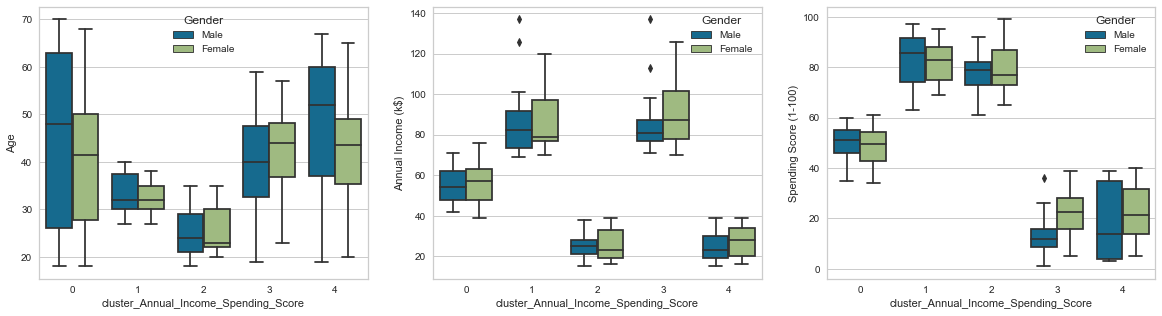

In [161]:
plt.figure(figsize = (20,5))

plt.subplot(131)
sns.boxplot(y = "Age", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

plt.subplot(132)
sns.boxplot(y = "Annual Income (k$)", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

plt.subplot(133)
sns.boxplot(y = "Spending Score (1-100)", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)
plt.show()

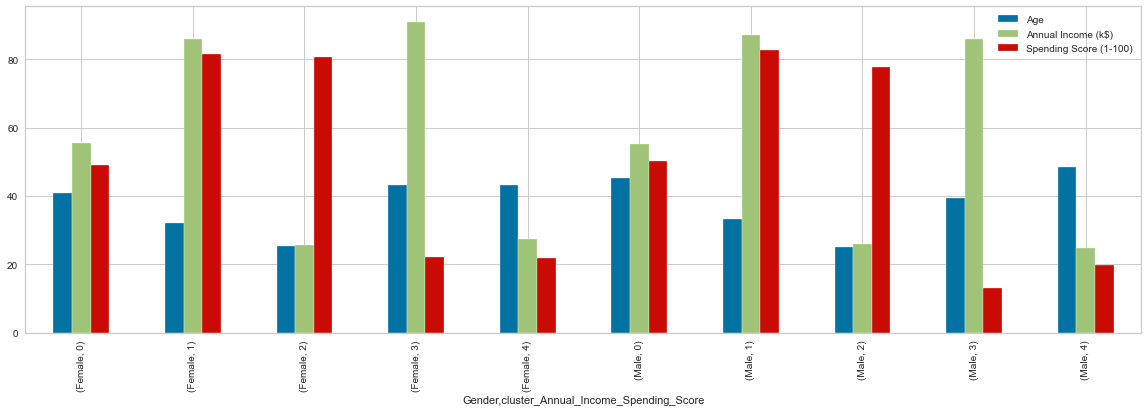

In [162]:
df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar", figsize=(20,6))
plt.show()

#### Conclusion
Female

cluster 0 : The average age is around 40, both annula_income and spending_scores are on average. It should be researched what can be done to direct more spending.

cluster 1: The average age is around 32, the annula_income is very high but the spending_scores is low. This group is our target audience and special strategies need to be developed for this group.

cluster 2 :The average age is around 25. Both annula_income and spending_scores are low. It can be directed to shopping with gift certificates.

cluster 3: The average age is around 43. Low annual_incomes but very high spending scores. This group does a lot of shopping, but they do not bring much profit.

cluster 4: The average age is around 43, the annual income and the spending_score is very high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it.

Male

cluster 0 : The average age is around 45, both annula_income and spending_scores are on average. It should be researched what can be done to direct more spending.

cluster 1: The average age is around 33, the annula_income is very high but the spending_scores is very low. This group is our target audience and special strategies need to be developed for this group.

cluster 2 :The average age is around 25. Both annula_income and spending_scores are low. It can be directed to shopping with gift certificates.

cluster 3: The average age is around 39. Low annual_incomes but very high spending scores. This group does a lot of shopping, but they do not bring much profit.

cluster 4: The average age is around 48, the annual income and the spending_score is very high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it.



In [163]:
df.groupby("cluster_Annual_Income_Spending_Score").mean()

,Age,Annual Income (k$),Spending Score (1-100)
cluster_Annual_Income_Spending_Score,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


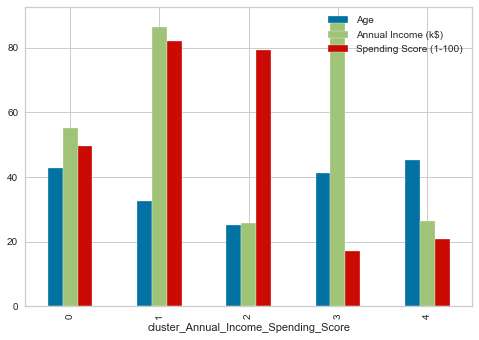

In [164]:
df.groupby("cluster_Annual_Income_Spending_Score").mean().plot(kind='bar')
plt.show()

#### 
cluster 0 : The average age is around 42, both annula_income and spending_scores are on average. It should be researched what can be done to direct more spending.

cluster 1: The average age is around 32, both annula_income and spending_scores are very high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it.

cluster 2 :The average age is around 25. Both annula_income and spending_scores are low. It can be directed to shopping with gift certificates.

cluster 3: The average age is around 41. Low annual_incomes but very high spending scores. This group does a lot of shopping, but they do not bring much profit.

cluster 4: The average age is around 45, their annual income is very high but their spending_score is very low. This group is our target audience and special strategies need to be developed for this group.